# **Análise Preditiva de Cogumelos**

```
Ciência da Computação - Turma 07N
Projeto - Inteligência Artificial
```

<table>
    <tr> <td bgcolor="red"> Grupo </td> <td bgcolor="red"> RA </td>
    <tr> <td> Bruno Castro Tomaz </td> <td> 10389988 </td>
    <tr> <td> Tomás Fiorelli Barbosa </td> <td> 10395687 </td>
</table>

---

### Bibliotecas Importadas

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

---

## Análise Exploratória e Preparação dos Dados

In [2]:
# Carregando o dataset (substitua 'caminho_do_dataset.csv' pelo caminho correto)
dataset_path = 'mushroom_dataset.csv'
data = pd.read_csv(dataset_path, sep=';')

In [3]:
# Exibindo as 5 primeiras linhas do dataset
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w



Contagem do atributo alvo 'class':
class
p    33888
e    27181
Name: count, dtype: int64


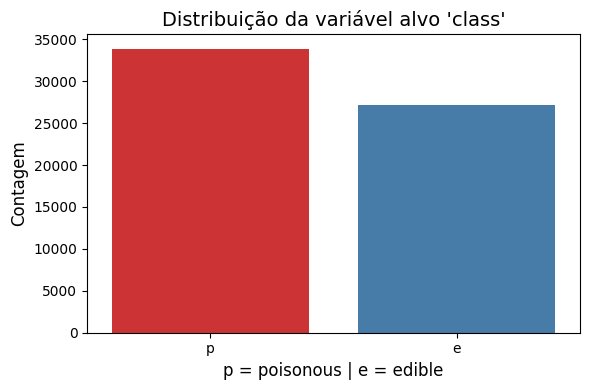

In [4]:
# Contagem das classes na variável alvo 'class'
class_counts = data['class'].value_counts()

# Exibindo a contagem das classes
print("\nContagem do atributo alvo 'class':")
print(class_counts)

# Plotando o histograma para a variável alvo 'class'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='class', hue='class', palette='Set1', legend=False)
plt.title("Distribuição da variável alvo 'class'", fontsize=14)
plt.xlabel("p = poisonous | e = edible", fontsize=12)
plt.ylabel("Contagem", fontsize=12)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [5]:
# Exibindo informações gerais sobre as colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [6]:
# Exibindo a distribuição de valores únicos para cada coluna
for column in data.columns:
    print(f"{column}: {data[column].nunique()} valores únicos")

class: 2 valores únicos
cap-diameter: 2571 valores únicos
cap-shape: 7 valores únicos
cap-surface: 11 valores únicos
cap-color: 12 valores únicos
does-bruise-or-bleed: 2 valores únicos
gill-attachment: 7 valores únicos
gill-spacing: 3 valores únicos
gill-color: 12 valores únicos
stem-height: 2226 valores únicos
stem-width: 4630 valores únicos
stem-root: 5 valores únicos
stem-surface: 8 valores únicos
stem-color: 13 valores únicos
veil-type: 1 valores únicos
veil-color: 6 valores únicos
has-ring: 2 valores únicos
ring-type: 8 valores únicos
spore-print-color: 7 valores únicos
habitat: 8 valores únicos
season: 4 valores únicos


In [7]:
# Exibindo estatísticas descritivas para colunas numéricas
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


Como podemos observar nas informações gerais das colunas, alguns atributos do datasset possuem mais da metade de seus registros sem valor atribuído. Diante dessa análise, será desconsiderado as colunas que apresentarem essas características de possuirem 40% ou mais valores nulos, a fim de melhorar a qualidade do dataset. O valor de 40% foi definido com o intuito de remover, os seguintes atributos: `['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']`. Em seguida, também atribuiremos o valor `NO_DATA` para todos os valores restantes nulos. Assim, as futuras análises do dataset não serão afetadas pela falta de dados em certos registros

In [8]:
# Removendo colunas com 40% ou mais de valores nulos
null_threshold = 0.40
columns_to_drop_null = data.columns[data.isnull().mean() >= null_threshold]
print(f"Colunas removidas por valores nulos >= 40%: {list(columns_to_drop_null)}")
data = data.drop(columns=columns_to_drop_null)

Colunas removidas por valores nulos >= 40%: ['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']


In [9]:
# Substituindo valores nulos por "NO_DATA"
data = data.fillna("NO_DATA")

In [10]:
# Dataset após limpeza
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w


In [11]:
# Verificando novamente informações gerais do dataset limpo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-color            61069 non-null  object 
 11  has-ring              61069 non-null  object 
 12  ring-type             61069 non-null  object 
 13  habitat               61069 non-null  object 
 14  season                61069 non-null  object 
dtypes: float64(3), obje

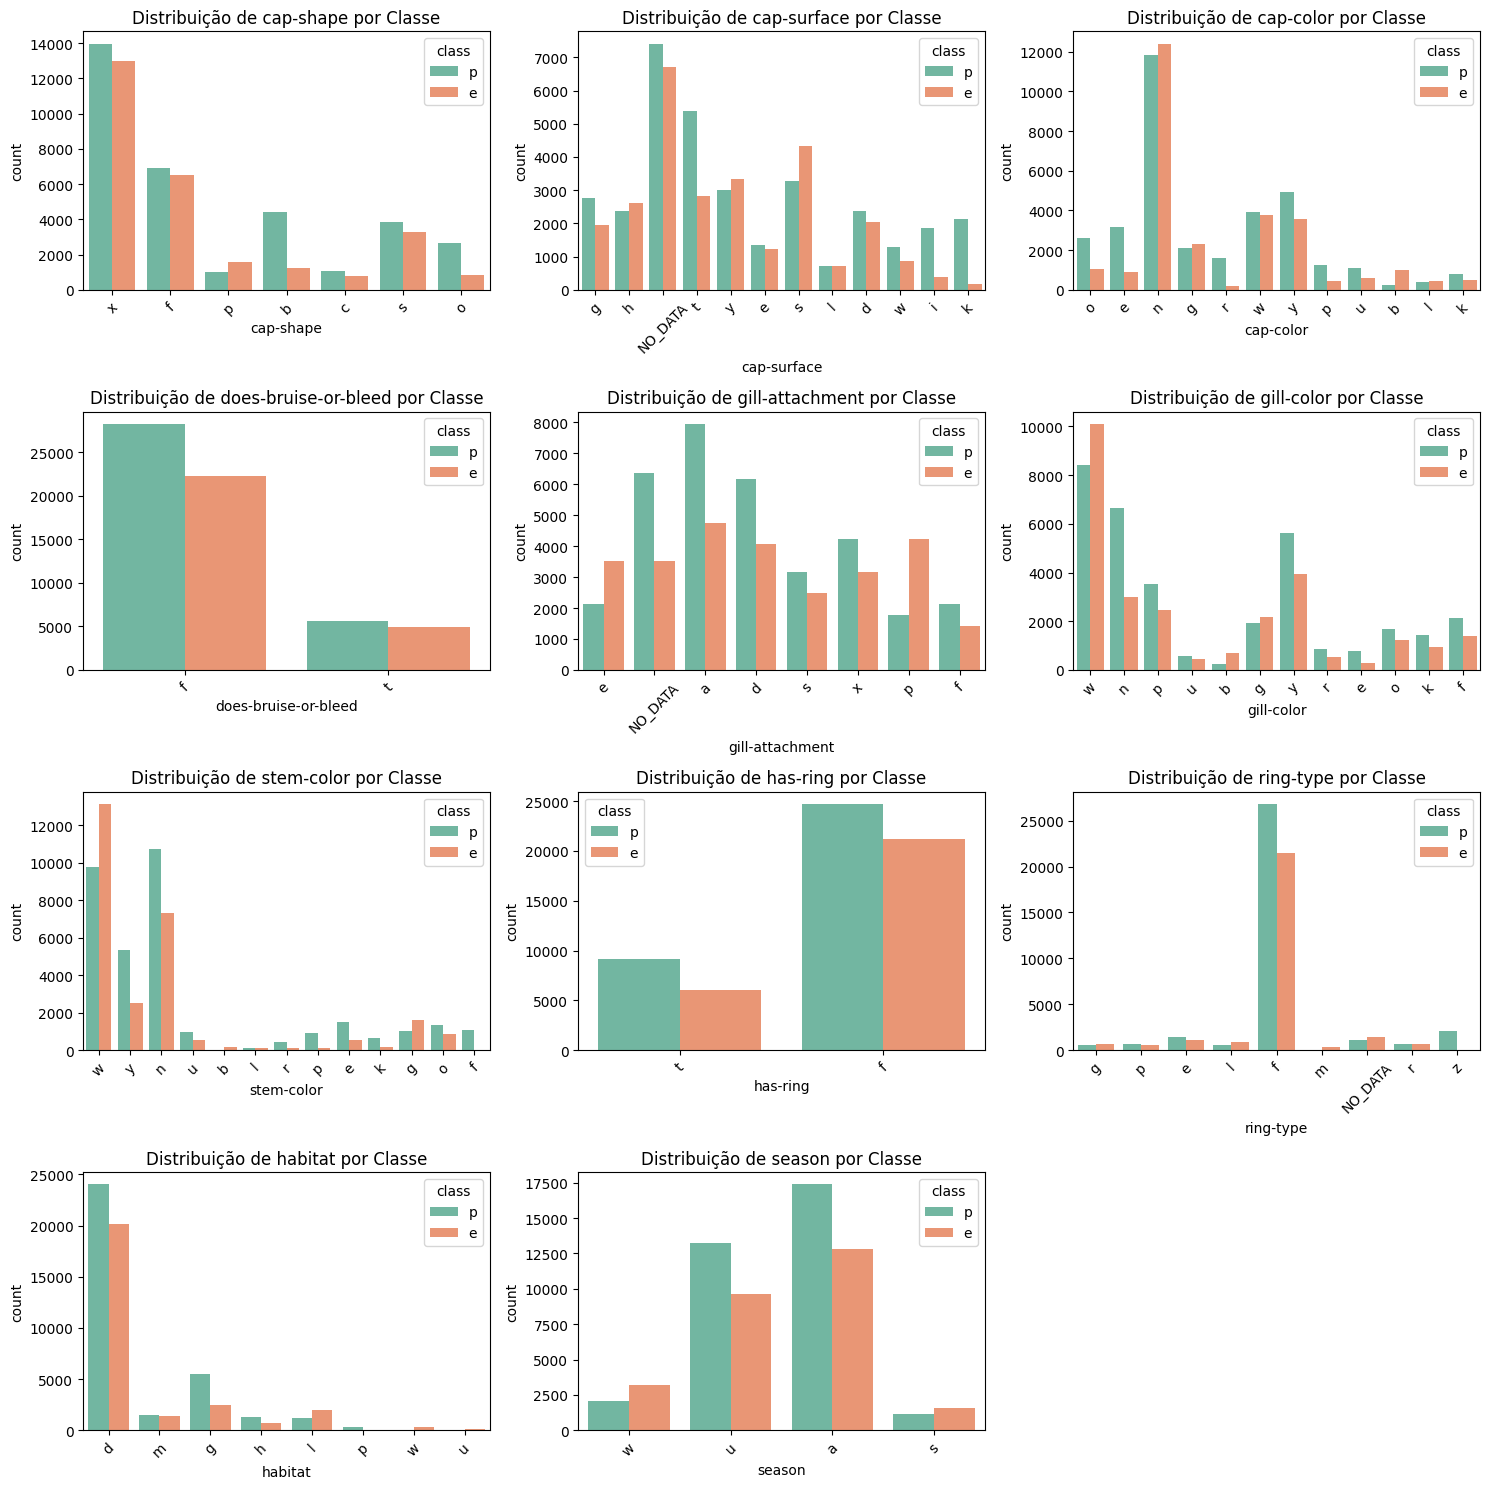

In [12]:
# Definindo as variáveis categóricas do dataset (exceto 'class')
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('class')  # Removendo a coluna 'class' da lista

# Configurando o gráfico
plt.figure(figsize=(15, 15))
n = len(categorical_columns)
ncols = 3  # Definindo o número de colunas de gráficos
nrows = (n // ncols) + (n % ncols > 0)  # Calculando o número de linhas necessárias

# Plotando os histogramas para as variáveis categóricas em relação à variável alvo 'class'
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(data=data, x=column, hue='class', palette='Set2')
    plt.title(f"Distribuição de {column} por Classe", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

# Exibindo o gráfico
plt.show()

## Algoritmos de Classificação

1) *K-Nearest Neighbors* (KNN) 
2) Árvore de Decisão (CART - *Classification and Regression Trees*)
3) Regressão Logística
4) Naïve Bayes
5) Máquinas de Vetores de Suporte (SVMs - *Support Vector Machines*)
6) Random Forest
7) AdaBoost

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# One-Hot Encoding
from sklearn.preprocessing import StandardScaler

# Importando os módulos dos algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### One-Hot Encoding

In [14]:
# Separando as variáveis independentes (X) e a variável alvo (Y)
X = data.drop('class', axis=1)  # Removendo a coluna 'class'
Y = data['class']  # A variável alvo

# Aplicando One-Hot Encoding nas variáveis categóricas
X = pd.get_dummies(X, drop_first=True)  # Transforma as variáveis categóricas em colunas binárias

# Separando os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalizando as variáveis numéricas (se houver)
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

In [15]:
# Definindo o tamanho das amostras
teste_size = 0.2

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 23

In [16]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [17]:
# Preparando a lista de modelos instanciados
modelos = []
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('LR', LogisticRegression()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))
modelos.append(('RFor', RandomForestClassifier()))
modelos.append(('AdaB', AdaBoostClassifier()))

In [18]:
# Avaliando cada modelo em um loop
dicAcuracia = {}
dicMatriz = {}
dicRelatorio = {}

for nome, modelo in modelos:
    # Treinamento do modelo
    modelo.fit(X_treino, Y_treino)
    # Fazendo as previsões e construindo a Matriz de Confusão
    previsoes = modelo.predict(X_teste)
    # Obtendo a matriz de confusão
    matrix = confusion_matrix(Y_teste, previsoes)
    # construindo o relatório de resultados
    report = classification_report(Y_teste, previsoes)
    # Score do modelo nos dados de teste  (Acurácia)
    acuracia = modelo.score(X_teste, Y_teste)
    # Criando dicionários para a acurácia matriz de confusão e relatório
    dicAcuracia[nome] = acuracia*100.0
    dicMatriz[nome] = matrix
    dicRelatorio[nome] = report

In [19]:
# Montando um dataframe com a acurácia obtida de cada modelo
pdAcuraciaModelos = pd.DataFrame(dicAcuracia.items())
pdAcuraciaModelos.columns = ['nome','acuracia']

In [20]:
# Apresenta a acurácia dos modelos ordenados
pdAcuraciaModelos.sort_values(ascending=False, by='acuracia')

,nome,acuracia
5,RFor,99.983625
0,KNN,99.860815
1,CART,99.762568
4,SVM,89.659407
6,AdaB,79.998363
2,LR,78.131652
3,NB,66.923203


In [21]:
dicAcuraciaTreinamento = {}

for nome, modelo in modelos:
    # Treinamento do modelo
    modelo.fit(X_treino, Y_treino)
    
    # Acurácia no treino
    acuracia_treino = modelo.score(X_treino, Y_treino) * 100.0
    dicAcuraciaTreinamento[nome] = acuracia_treino
    
    # Acurácia no teste
    acuracia_teste = modelo.score(X_teste, Y_teste) * 100.0
    dicAcuracia[nome] = acuracia_teste
    
    print(f'{nome} - Acurácia no Treinamento: {acuracia_treino:.2f}% | Acurácia no Teste: {acuracia_teste:.2f}%')

KNN - Acurácia no Treinamento: 99.87% | Acurácia no Teste: 99.86%
CART - Acurácia no Treinamento: 100.00% | Acurácia no Teste: 99.78%
LR - Acurácia no Treinamento: 77.83% | Acurácia no Teste: 78.13%
NB - Acurácia no Treinamento: 67.18% | Acurácia no Teste: 66.92%
SVM - Acurácia no Treinamento: 89.42% | Acurácia no Teste: 89.66%
RFor - Acurácia no Treinamento: 100.00% | Acurácia no Teste: 99.99%
AdaB - Acurácia no Treinamento: 79.44% | Acurácia no Teste: 80.00%


In [22]:
from sklearn.metrics import f1_score

# Calcular o F1-score
for nome, modelo in modelos:
    modelo.fit(X_treino, Y_treino)
    
    # Previsões no teste
    previsoes = modelo.predict(X_teste)
    
    # Calculando o F1-score
    f1_teste = f1_score(Y_teste, previsoes, average='weighted')
    f1_treino = f1_score(Y_treino, modelo.predict(X_treino), average='weighted')
    
    print(f'{nome} - F1-Score no Treinamento: {f1_treino:.4f} | F1-Score no Teste: {f1_teste:.4f}')

KNN - F1-Score no Treinamento: 0.9987 | F1-Score no Teste: 0.9986
CART - F1-Score no Treinamento: 1.0000 | F1-Score no Teste: 0.9979
LR - F1-Score no Treinamento: 0.7785 | F1-Score no Teste: 0.7816
NB - F1-Score no Treinamento: 0.6675 | F1-Score no Teste: 0.6643
SVM - F1-Score no Treinamento: 0.8942 | F1-Score no Teste: 0.8966
RFor - F1-Score no Treinamento: 1.0000 | F1-Score no Teste: 0.9998
AdaB - F1-Score no Treinamento: 0.7943 | F1-Score no Teste: 0.7999


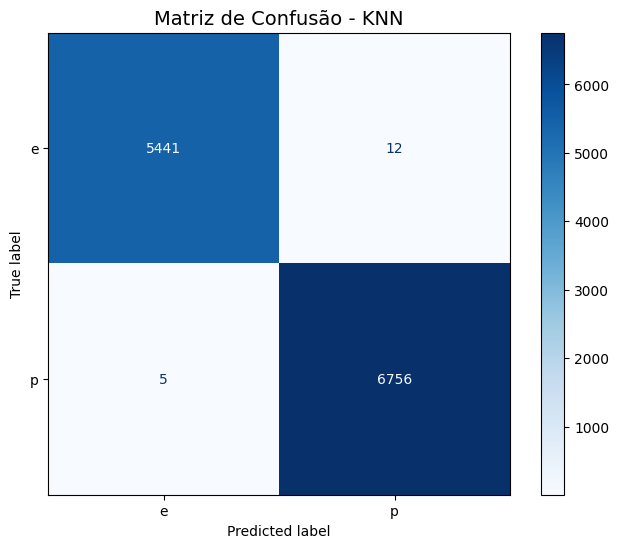

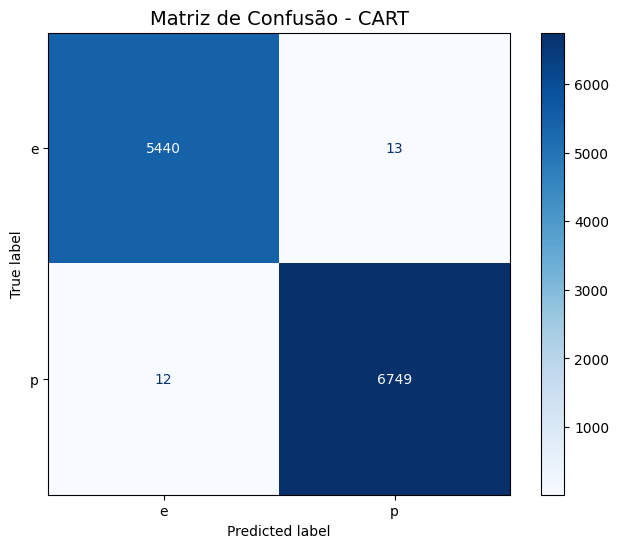

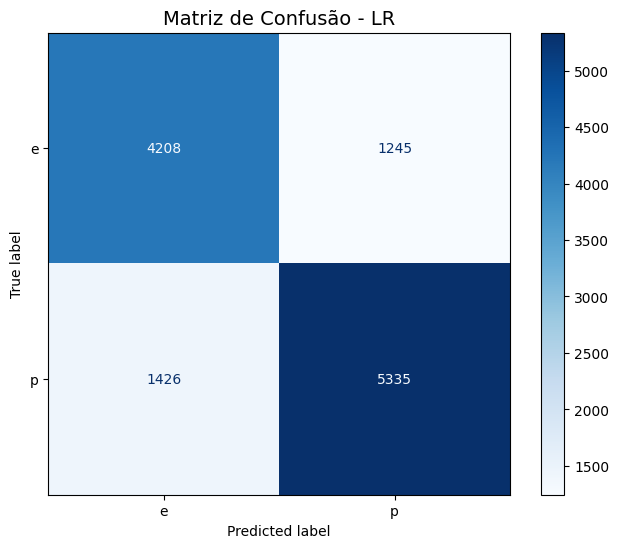

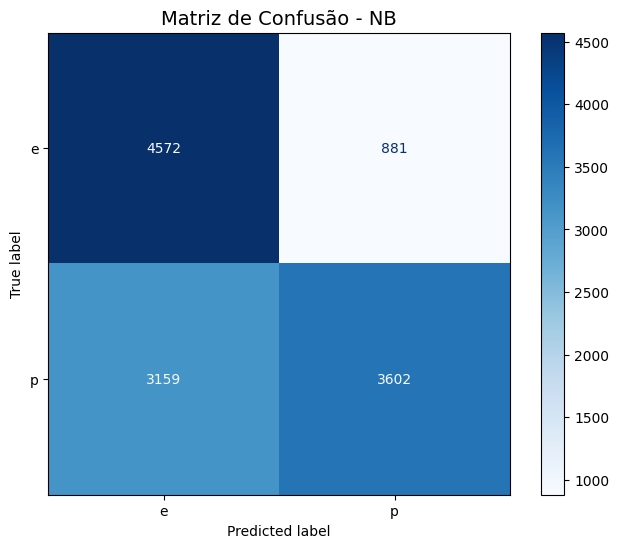

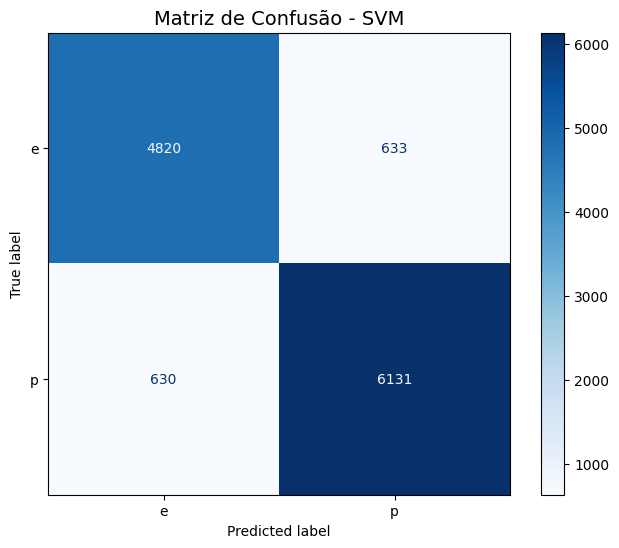

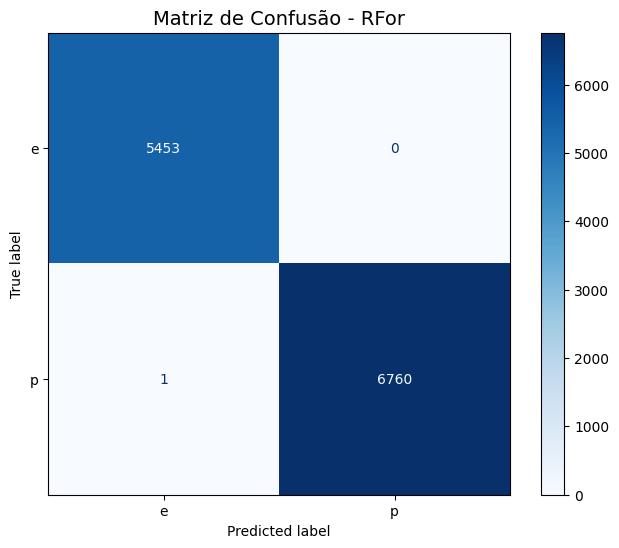

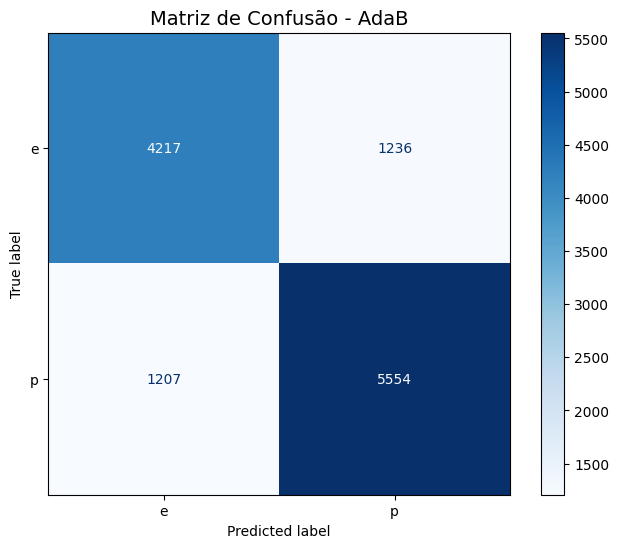

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dicionário para armazenar matrizes de confusão
dicMatriz = {}

for nome, modelo in modelos:
    # Treinamento do modelo
    modelo.fit(X_treino, Y_treino)
    
    # Previsões no conjunto de teste
    previsoes = modelo.predict(X_teste)
    
    # Gerando a matriz de confusão
    matrix = confusion_matrix(Y_teste, previsoes, labels=modelo.classes_)
    dicMatriz[nome] = matrix
    
    # Exibindo a matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modelo.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))  # Ajustando o tamanho da figura
    disp.plot(cmap='Blues', ax=ax)          # Definindo o mapa de cores e o eixo
    ax.set_title(f'Matriz de Confusão - {nome}', fontsize=14)  # Adicionando o título
    plt.show()                              # Mostrando o plot